In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.options.mode.use_inf_as_na = True
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\SC\AppData\Local\Temp\ipykernel_16488\3716663245.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [2]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('archive/emnist-letters-test.csv')
training_letter = pd.read_csv('archive/emnist-letters-train.csv')

In [3]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [4]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


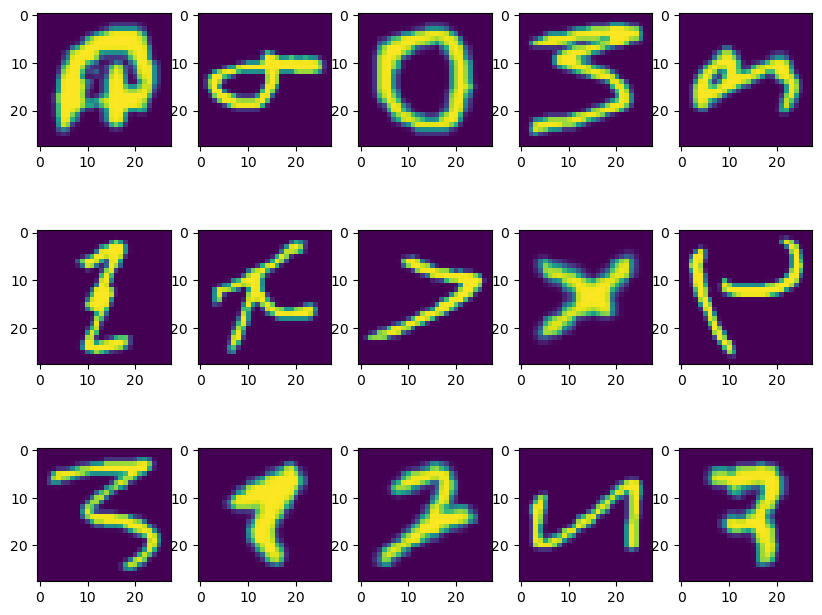

In [5]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

## Preprocesssing

### 1. Normalisation and reshaping of data

In [6]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [7]:
import tensorflow as tf
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [8]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [11]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
 
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [14]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10


2219/2220 [============================>.] - ETA: 0s - loss: 0.5575 - accuracy: 0.8254
Epoch 1: val_accuracy improved from -inf to 0.88390, saving model to Best_points.h5


c:\Users\SC\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2220/2220 [==============================] - 134s 58ms/step - loss: 0.5573 - accuracy: 0.8254 - val_loss: 0.3534 - val_accuracy: 0.8839 - lr: 0.0010
Epoch 2/10
2219/2220 [============================>.] - ETA: 0s - loss: 0.2725 - accuracy: 0.9112
Epoch 2: val_accuracy improved from 0.88390 to 0.89916, saving model to Best_points.h5
2220/2220 [==============================] - 91s 41ms/step - loss: 0.2726 - accuracy: 0.9112 - val_loss: 0.3059 - val_accuracy: 0.8992 - lr: 0.0010
Epoch 3/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2034 - accuracy: 0.9304
Epoch 3: val_accuracy improved from 0.89916 to 0.90507, saving model to Best_points.h5
2220/2220 [==============================] - 87s 39ms/step - loss: 0.2034 - accuracy: 0.9304 - val_loss: 0.3066 - val_accuracy: 0.9051 - lr: 0.0010
Epoch 4/10
2220/2220 [==============================] - ETA: 0s - loss: 0.1642 - accuracy: 0.9430
Epoch 4: val_accuracy improved from 0.90507 to 0.90580, saving model to Best_points.h5


In [15]:
import seaborn as sns

c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'Accuray')

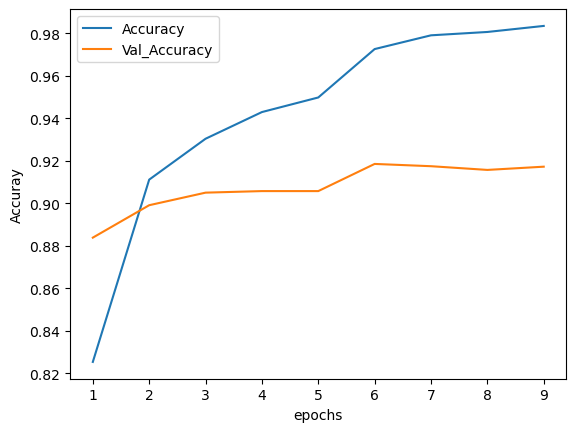

In [16]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [17]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)


history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Epoch 1/10
2359/2359 [==============================] - 81s 34ms/step - loss: 0.0705 - accuracy: 0.9763 - val_loss: 0.3461 - val_accuracy: 0.9215
Epoch 2/10
2359/2359 [==============================] - 80s 34ms/step - loss: 0.0618 - accuracy: 0.9781 - val_loss: 0.3484 - val_accuracy: 0.9217
Epoch 3/10
2359/2359 [==============================] - 80s 34ms/step - loss: 0.0557 - accuracy: 0.9800 - val_loss: 0.3470 - val_accuracy: 0.9194
Epoch 4/10
2359/2359 [==============================] - 81s 34ms/step - loss: 0.0514 - accuracy: 0.9810 - val_loss: 0.3943 - val_accuracy: 0.9203
Epoch 5/10
2359/2359 [==============================] - 88s 37ms/step - loss: 0.0477 - accuracy: 0.9818 - val_loss: 0.3654 - val_accuracy: 0.9197
Epoch 6/10
2359/2359 [==============================] - 89s 38ms/step - loss: 0.0450 - accuracy: 0.9823 - val_loss: 0.3952 - val_accuracy: 0.9194
Epoch 7/10
2359/2359 [==============================] - 90s 38ms/step - loss: 0.0425 - accuracy: 0.9832 - val_loss: 0.4341 -

c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0, 0.5, 'Accuray')

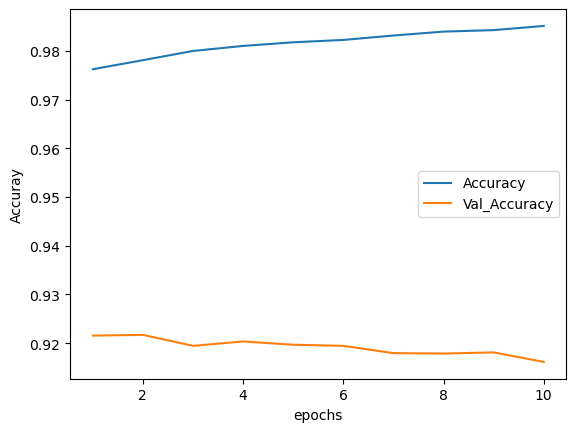

In [18]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [19]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
    # Preprocess the image (e.g., resize, normalize, etc.)
    image_resized = cv2.resize(image, (28, 28))  # Resize image to match model input shape
    image_normalized = image_resized / 255.0  # Normalize pixel values
    # Reshape the image to match the input shape expected by the model
    image_processed = np.expand_dims(image_normalized, axis=-1)  # Add channel dimension
    image_processed = np.expand_dims(image_processed, axis=0)  # Add batch dimension
    return image_processed





def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions[0])
    return predicted_class

In [20]:
image_path = 'D:/FYP/Model/download.png'
predicted_class = predict_image(image_path)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 94ms/step
Predicted class: 28
